# <center> Face Mask Detection In Python Using OpenCV
<center> #Covid 19 #Image analytics #Image segmentation 

 
##  **Author** : Deepika Sharma   
Contact: deepikasharma.stats@gmail.com                                            
**Date** : 07 July 2020


**Index:**

1. Preamble
2. Explore CV2 pretrained models for face detection before detecting mask
3. Try work around to detect faces which `CV2` Haar and LBP classifier can not detect.
4. Detect faces and detect if Face mask worn or not.
5. End Notes.

## 1. Preamble


I always had this question : How does Camera work? Until a few months ago, I finally got my answer for it. For which, I will write a separate blog.

On a "super" High level, explaination goes like this

A camera lens takes all the light rays bouncing around and uses glass to redirect them to a single point, creating a sharp image. When all of those light rays meet back together on a digital camera sensor or a piece of film, they create a sharp image.

So, light rays which camera lens receives have different wavelengths, which ends up creating gradients in the image vectors, **`which we later analyse when working on png/jpg in combination of shape and per unit change in color of a pixel`.** 


For ex : Black is 0 , White is 255 in a grascale image. Range between 0-50 is black, 50-100 is somewhere between Red or Dark Blue, 100-150 is light blue... we can discretise it further.

<img src="https://image.shutterstock.com/image-photo/biometric-identification-africanamerican-woman-scanning-600w-1314016142.jpg" alt="Drawing" style="width: 400px;"/>

- courtesy : shutterstock

We all know our fevorite algorithm : Gradient descent which majorly works on the principle of differential equations. Correction! partial differential equations.

<img src="https://blog.paperspace.com/content/images/size/w2000/2018/05/convex_cost_function.jpg" alt="Drawing" style="width: 600px;"/>

Theory aside, I will be talking about two steps in face mask detection problem.


The problem is solved in two steps

`1. Detecting human faces in an image.`

`2. Detecting if human face has mask on it or not.`

Note: there are plently of pre trained models for detecting face mask, which are able to detect mask without taking care of both. Caveats which I found out while solving this problem with pre-trained mask detection models are following:
1. Models trained using masked faces and non mask faces using supervised training are basically biased towards shape of mask on a human face and training learns patterns for a mask.
2. There are not many models which first identifies landmarks of a human face in an image unless explicitely model is trained that way!

``Hence I decided to take an extra tour and break the problem statement to two steps.``

## Background on face detection

`OpenCV` provides us with two pre-trained (already trained and ready to be used for detection) classifiers:

1. Haar Classifier
2. LBP Classifier

### Haar Classifier

Haar features:

<img src="https://static.packt-cdn.com/products/9781789343731/graphics/652408eb-95ce-4a92-9975-0732a903284b.png" alt="Drawing" style="width: 200px;"/>



Feature Detection:

<img src="https://docs.opencv.org/3.4/haar.png" alt="Drawing" style="width: 300px;"/>


### LBP Cascade Classifier

LBP (Local Binary Patterns) is a visual/texture descriptor and our face too is composed of micro visual patterns. 

Steps are available here https://docs.opencv.org/master/dc/d88/tutorial_traincascade.html 

<img src="https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/5_blog_image_9.png" alt="Drawing" style="width: 700px;"/> 


## 2. Lets Detect Face Using OpenCV

In [1]:
#import required libraries 
#import OpenCV library
import cv2
#import matplotlib library
import matplotlib.pyplot as plt
#importing time library for speed comparisons of both classifiers
import time 
%matplotlib inline

In [2]:
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

**`cv2.cvtColor`** is an OpenCV function to convert images to different color spaces. It takes an image to convert and a color space code (like cv2.COLOR_BGR2RGB) to convert image to and returns the converted image. 

In [3]:
#load test iamge
test1 = cv2.imread('input_images/img.jpg')

#convert the test image to gray image as opencv face detector expects gray images
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

Now let's load Haar Face Cascade pretrained model. 

In [4]:
#load cascade classifier training file for haarcascade
haar_face_cascade = cv2.CascadeClassifier('pre_trained_models/haarcascade_frontalface_alt.xml')
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5);
print('Faces found: ', len(faces))

Faces found:  0


Oops! No faces detected!

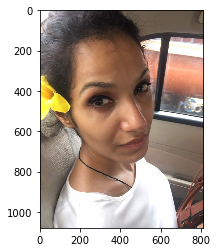

In [5]:
plt.imshow(convertToRGB(test1))

No face detected! Faces with angle do not get detected using CV2 pre-trained models. `Lets try another face.`

In [6]:
#go over list of faces and draw them as rectangles on original colored img
test1 = cv2.imread('input_images/img11.jpg')
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5);
for (x, y, w, h) in faces:
    cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)

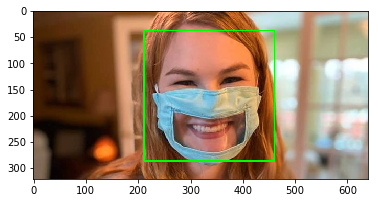

In [7]:
#conver image to RGB and show image
plt.imshow(convertToRGB(test1))

Here is the Caveat, Haar and LBP classifiers are not able to detect all the faces. Which we will be resolving now.

## 3. Work around to detect `all` faces

Install Face Alignment :   https://github.com/1adrianb/face-alignment

`Requirements:`

opencv-python; scipy>=0.17.0 ; scikit-image

In [8]:
import os
import cv2
import imutils
import numpy as np
from imutils import face_utils
import face_alignment



def detect_mask(im, margin = 20, ratio = 0.5):
    im_resized = imutils.resize(im, width=500, height = 500)
    fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, device='cpu')
    
    arr = fa.get_landmarks(im_resized)
    if arr != None:
        for i in range(len(arr)):
            preds = arr[i]
            
            # These co-ordinates are standard for all huamn face images
            skin_1 = im_resized[int(preds[22][1])-margin:int(preds[23][1])+margin,int(preds[22][0]):int(preds[23][0])]
            skin_2 = im_resized[int(preds[30][1]):int(preds[31][1]),int(preds[2][0]):int(preds[30][0])]
            skin = (np.mean(skin_1)+np.mean(skin_2))/2
            
            try:        
                cheeks_1 = im_resized[int(preds[31][1]):int(preds[58][1]),int(preds[4][0]):int(preds[49][0])]
                cheeks_2 = im_resized[int(preds[31][1]):int(preds[58][1]),int(preds[55][0]):int(preds[14][0])]
                cheeks_mean = (np.mean(cheeks_1)+np.mean(cheeks_2))/2        

            except:pass
            
            for (x, y) in preds:
                cv2.circle(im_resized, (x, y), 2, (150, 0, 0), -1)

            test = im_resized[int(preds[31][1]):int(preds[12][1]),int(preds[3][0]):int(preds[15][0])]
            
            if len(arr) <= 1:
                ratio = ratio+0.1
                
            # this rule is pretty custom, will be trining a separate model to find out right thresholds.
            if abs(skin -  cheeks_mean) > 8 and abs(np.mean(test) -  cheeks_mean) < 10:
                if 0 < abs(np.mean(test)) <= 50:
                    col = "Black"
                if 50 < abs(np.mean(test)) <= 100:
                    col = "Red or Dark blue"
                if 100 < abs(np.mean(test)) <= 150:
                    col = "Light blue"
                if 150 < abs(np.mean(test)) <= 200:
                    col = "Blue"
                if 200 < abs(np.mean(test)):
                    col = "White"

                cv2.putText(im_resized, "Face Mask ON", (int(x), int(y)+50), cv2.FONT_HERSHEY_SIMPLEX, ratio, (0, 255, 0), 2)
                cv2.putText(im_resized, col, (int(x), int(y)+65), cv2.FONT_HERSHEY_SIMPLEX, ratio, (0, 255, 0), 2)
#                 cv2.imshow("Output", image)
#                 cv2.waitKey(0)
            else:
                cv2.putText(im_resized, "NO Face Mask", (int(x)-50, int(y)+60), cv2.FONT_HERSHEY_SIMPLEX, ratio, (0, 255, 0), 2)
#                 cv2.imshow("Output", image)
#                 cv2.waitKey(0)
           
    return im_resized

D:\Anaconda\envs\new_environment\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Anaconda\envs\new_environment\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


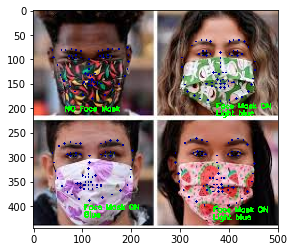

In [9]:
image_list = os.listdir('input_images/')

for image in image_list: 
    im = cv2.imread('input_images/'+image)
    image_post_detection = detect_mask(im, margin = 20, ratio = 0.5)
    cv2.imwrite("output/"+image, image_post_detection)
    plt.imshow(convertToRGB(image_post_detection))

## End Notes

As you can see, solution provides flase positive in following cases:

- If image is blurred or dark, where human face and mask are not identified distinctly.
- Image clicked with low resolution and Face landmarks are not detected or Face landmarks are detected incorrectly.
- Face mask is not getting detected if mask color matches with skin color.
- If detected face landmarks are incorrect and landmarks for mouth area are detected somewhere else on the face.
- Not all faces are detected in an image.


## Next Steps

- Will train a CNN to pick more sophisticated features to detect a mask on face using color and depth information from pixels.